In [1]:
# if (!requireNamespace("BiocManager", quietly=TRUE)) 
#     install.packages("BiocManager") 

# BiocManager::install("phyloseq")

In [1]:
.libPaths(R.home('/opt/homebrew/Caskroom/miniforge/base/lib/R/library'))
Output = '/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1013. Microbiome Peanut Allergy/P1013.3. Analyses/P1013.3.2. Descriptive Statistics/Output'
cur_date = '022126'

library(readxl)
library(openxlsx)
library(writexl)
library(tidyverse)
library(factoextra)
library(gtsummary)
library(phyloseq)
library(ANCOMBC) 

# reading in files
saliva_df = data.frame(read_excel("Input/Processed_Saliva_Data_090525.xlsx")) %>%
    mutate(Age = as.numeric(Age), IgE = as.numeric(IgE)) 
stool_df = data.frame(read_excel("Input/Processed_Stool_Data_090525.xlsx")) %>%
    mutate(Age = as.numeric(Age), IgE = as.numeric(IgE)) 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [2]:
head(saliva_df)

,Original_Sample_ID,Subject_No,Sample_ID,Time_Point,Treatment,Outcome,Age,IgE,IgE_Binarized,k__Bacteria.__.__.__.__.__.__,⋯,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.__.__,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.g__Aggregatibacter.__,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.g__Aggregatibacter.s__aphrophilus,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.g__Haemophilus.__,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.g__Haemophilus.s__parainfluenzae,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.1..__,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.1..s__bacterium_HMT_347,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.1..s__bacterium_HMT_352,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.3..s__bacterium_HMT_351,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.6..s__bacterium_HMT_870
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,FS01baseline,1,Pre_1,Pre,P,F,3.838356,41.00,High,7,⋯,57,13,0,213,775,0,14,246,44,64
2,FS0236mo,2,Post_2,Post,A,DS,1.873973,14.20,Low,63,⋯,698,0,43,98,1657,0,0,423,146,123
3,FS02baseline,2,Pre_2,Pre,A,DS,1.873973,14.20,Low,0,⋯,0,0,46,371,3359,0,0,0,0,112
4,FS0436mo,3,Post_3,Post,P,F,3.715068,67.40,High,34,⋯,0,0,0,0,92,0,200,67,32,201
5,FS04baseline,3,Pre_3,Pre,P,F,3.715068,67.40,High,4,⋯,0,0,0,0,43,414,47,0,2,1050
6,FS0536mo,4,Post_4,Post,A,DS,3.991781,9.59,Low,6,⋯,0,17,0,139,2521,0,0,502,39,101


## Descriptive Statistics

In [3]:
saliva_df$Outcome = as.character(saliva_df$Outcome)
stool_df$Outcome = as.character(stool_df$Outcome)

combined_saliva_df = saliva_df  %>%
    # ended up reassinging 'DS' to 'F' due to small sample size
    mutate(Outcome = ifelse(Outcome == 'DS', 'F', Outcome)) %>%
    # removing those failed the IgE protein
    filter(IgE_Binarized != 'Fail')

combined_stool_df = stool_df  %>%
    # ended up reassinging 'DS' to 'F' due to small sample size
    mutate(Outcome = ifelse(Outcome == 'DS', 'F', Outcome)) %>%
    filter(IgE_Binarized != 'Fail')

# converting to factors
combined_saliva_df$Outcome = factor(combined_saliva_df$Outcome, levels = c('F', 'SU'))
combined_stool_df$Outcome = factor(combined_stool_df$Outcome, levels = c('F', 'SU'))
combined_saliva_df$Treatment = factor(combined_saliva_df$Treatment, levels = c('A', 'P'))
combined_stool_df$Treatment = factor(combined_stool_df$Treatment, levels = c('A', 'P'))
combined_saliva_df$IgE_Binarized = factor(combined_saliva_df$IgE_Binarized, levels = c('Low', 'High'))
combined_stool_df$IgE_Binarized = factor(combined_stool_df$IgE_Binarized, levels = c('Low', 'High'))
combined_saliva_df$Time_Point = factor(combined_saliva_df$Time_Point, levels = c('Pre', 'Post'))
combined_stool_df$Time_Point = factor(combined_stool_df$Time_Point, levels = c('Pre', 'Post'))

head(combined_saliva_df)

,Original_Sample_ID,Subject_No,Sample_ID,Time_Point,Treatment,Outcome,Age,IgE,IgE_Binarized,k__Bacteria.__.__.__.__.__.__,⋯,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.__.__,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.g__Aggregatibacter.__,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.g__Aggregatibacter.s__aphrophilus,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.g__Haemophilus.__,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.g__Haemophilus.s__parainfluenzae,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.1..__,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.1..s__bacterium_HMT_347,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.1..s__bacterium_HMT_352,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.3..s__bacterium_HMT_351,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.6..s__bacterium_HMT_870
,<chr>,<dbl>,<chr>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,FS01baseline,1,Pre_1,Pre,P,F,3.838356,41.00,High,7,⋯,57,13,0,213,775,0,14,246,44,64
2,FS0236mo,2,Post_2,Post,A,F,1.873973,14.20,Low,63,⋯,698,0,43,98,1657,0,0,423,146,123
3,FS02baseline,2,Pre_2,Pre,A,F,1.873973,14.20,Low,0,⋯,0,0,46,371,3359,0,0,0,0,112
4,FS0436mo,3,Post_3,Post,P,F,3.715068,67.40,High,34,⋯,0,0,0,0,92,0,200,67,32,201
5,FS04baseline,3,Pre_3,Pre,P,F,3.715068,67.40,High,4,⋯,0,0,0,0,43,414,47,0,2,1050
6,FS0536mo,4,Post_4,Post,A,F,3.991781,9.59,Low,6,⋯,0,17,0,139,2521,0,0,502,39,101


In [4]:
length(unique(saliva_df$Subject_No))
length(unique(combined_saliva_df$Subject_No))
length(unique(stool_df$Subject_No))
length(unique(combined_stool_df$Subject_No))

[1] 45

[1] 38

[1] 40

[1] 35

In [5]:
combined_saliva_df %>%
    filter(Time_Point == 'Pre') %>%
    tbl_summary(by = Outcome, missing = "no", 
    include = colnames(saliva_df[c(5,7:9)]), 
              statistic = list(all_continuous() ~ "{mean} ({sd})",
                               all_categorical() ~ "{n} ({p}%)")) %>%
    add_n() %>% 
    add_p(test = list(all_categorical() ~ "fisher.test")) %>% # adding p value from anova
    as_tibble() #%>%
    #write_xlsx(., "Output/Table_Saliva.xlsx")

The following warnings were returned during `add_p()`:
! For variable `Age` (`Outcome`) and "estimate", "statistic", "p.value",
  "conf.low", and "conf.high" statistics: cannot compute exact p-value with
  ties
! For variable `Age` (`Outcome`) and "estimate", "statistic", "p.value",
  "conf.low", and "conf.high" statistics: cannot compute exact confidence
  intervals with ties
! For variable `IgE` (`Outcome`) and "estimate", "statistic", "p.value",
  "conf.low", and "conf.high" statistics: cannot compute exact p-value with
  ties
! For variable `IgE` (`Outcome`) and "estimate", "statistic", "p.value",
  "conf.low", and "conf.high" statistics: cannot compute exact confidence
  intervals with ties


**Characteristic**,**N**,**F** N = 25,**SU** N = 10,**p-value**
<chr>,<chr>,<chr>,<chr>,<chr>
Treatment,35,NA,NA,<0.001
A,NA,9 (36%),10 (100%),NA
P,NA,16 (64%),0 (0%),NA
Age,35,2.67 (0.95),2.36 (1.05),0.3
IgE,35,47 (53),14 (35),0.002
IgE_Binarized,35,NA,NA,0.002
Low,NA,11 (44%),10 (100%),NA
High,NA,14 (56%),0 (0%),NA


In [6]:
combined_stool_df %>%
    filter(Time_Point == 'Pre') %>%
    tbl_summary(by = Outcome, missing = "no", 
    include = colnames(saliva_df[c(5,7:9)]), 
              statistic = list(all_continuous() ~ "{mean} ({sd})",
                               all_categorical() ~ "{n} ({p}%)")) %>%
    add_n() %>% 
    add_p(test = list(all_categorical() ~ "fisher.test")) %>% # adding p value from anova
    as_tibble() #%>%
    #write_xlsx(., "Output/Table_Stool.xlsx")

The following warnings were returned during `add_p()`:
! For variable `IgE` (`Outcome`) and "estimate", "statistic", "p.value",
  "conf.low", and "conf.high" statistics: cannot compute exact p-value with
  ties
! For variable `IgE` (`Outcome`) and "estimate", "statistic", "p.value",
  "conf.low", and "conf.high" statistics: cannot compute exact confidence
  intervals with ties


**Characteristic**,**N**,**F** N = 23,**SU** N = 10,**p-value**
<chr>,<chr>,<chr>,<chr>,<chr>
Treatment,33,NA,NA,<0.001
A,NA,6 (26%),10 (100%),NA
P,NA,17 (74%),0 (0%),NA
Age,33,2.50 (0.93),2.15 (0.92),0.3
IgE,33,50 (54),4 (4),<0.001
IgE_Binarized,33,NA,NA,0.001
Low,NA,9 (39%),10 (100%),NA
High,NA,14 (61%),0 (0%),NA


# Individual Bacteria Analyses

Determining if there are any significant differences in demographic variables based on outcome or time point. I used the *[ANCOM-BC2](https://www.bioconductor.org/packages/release/bioc/vignettes/ANCOMBC/inst/doc/ANCOMBC2.html)* package to perform a differential abundance analysis ([ref](https://www.nature.com/articles/s41592-023-02092-7#Sec1)) to run a couple of different models. 
The following models will be investigated below:

1. How do baseline microbiota differ across outcomes? How do these differences in microbiome abundances vary across participants with varying IgE levels and ages?
2. How do microbiota differ across outcomes post treatment? How do these differences in microbiome abundances vary across participants with varying IgE levels and ages?
3. How do baseline microbiota levels differ across IgE concentrations and how is that modulated by age?

Note: **Confounding** is a bias that distorts the true relationship, while **effect measure modification (EMM)** is a biological phenomenon where the exposure's effect varies across subgroups. Confounders should be adjusted for, whereas effect modifiers should be reported separately. To address this in models, confounders are adjusted for using an additive relationship with that variable is held constant for XXX. EMM are adjusted for using an interactive model where the variable is allowed to vary XXX.

## 1. How do baseline microbiome species differ between subjects that will go on to either have a muted or elevated allergic response? How are these abundances modulated by age and IgE?

In [7]:
`%notin%` = Negate(`%in%`)
v1_saliva_df = combined_saliva_df %>%
    # only keep participants' baseline samples and those given active treatment
    filter(Time_Point == 'Pre' & Treatment == 'A',
           # removing subjects that don't have post treatment samples
          Subject_No %notin% c(1,16,17,20,24,26,31,32,36,37,43)) %>%
    # making the row names the sample ids
    column_to_rownames(var = 'Sample_ID') %>%
    # normalizing ige and centering both ige and age
    mutate(IgE = as.numeric(scale(log(IgE), center = TRUE, scale = FALSE)), 
           Age = as.numeric(scale(Age, center = TRUE, scale = FALSE)))

v1_stool_df = combined_stool_df %>%
    filter(Time_Point == 'Pre' & Treatment == 'A',
          Subject_No %notin% c(3,10,14,15,23,25,27,32,35,39)) %>%
    column_to_rownames(var = 'Sample_ID') %>%
    mutate(IgE = as.numeric(scale(log(IgE), center = TRUE, scale = FALSE)), 
           Age = as.numeric(scale(Age, center = TRUE, scale = FALSE)))

v1_saliva_df$Outcome = factor(v1_saliva_df$Outcome, levels = c('F', 'SU'))
v1_stool_df$Outcome = factor(v1_stool_df$Outcome, levels = c('F', 'SU'))

head(v1_saliva_df)

,Original_Sample_ID,Subject_No,Time_Point,Treatment,Outcome,Age,IgE,IgE_Binarized,k__Bacteria.__.__.__.__.__.__,k__Bacteria.p__Absconditabacteria_.SR1..c__Absconditabacteria_.SR1._.C.1..o__Absconditabacteria_.SR1._.O.1..f__Absconditabacteria_.SR1._.F.1..g__Absconditabacteria_.SR1._.G.1..s__bacterium_HMT_874,⋯,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.__.__,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.g__Aggregatibacter.__,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.g__Aggregatibacter.s__aphrophilus,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.g__Haemophilus.__,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.g__Haemophilus.s__parainfluenzae,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.1..__,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.1..s__bacterium_HMT_347,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.1..s__bacterium_HMT_352,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.3..s__bacterium_HMT_351,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.6..s__bacterium_HMT_870
,<chr>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Pre_2,FS02baseline,2,Pre,A,F,-0.8410959,0.8886577,Low,0,16,⋯,0,0,46,371,3359,0,0,0,0,112
Pre_4,FS05baseline,4,Pre,A,F,1.2767123,0.4961366,Low,24,0,⋯,0,0,0,110,1225,40,4,403,35,167
Pre_6,FS07baseline,6,Pre,A,SU,-1.2958904,-1.4869525,Low,7,0,⋯,0,0,0,2315,1978,0,16,0,5,28
Pre_9,FS10baseline,9,Pre,A,SU,-1.3260274,-2.6320848,Low,9,0,⋯,0,0,0,1450,4274,0,0,0,0,7
Pre_11,FS12baseline,11,Pre,A,F,-1.1479452,-0.2967099,Low,8,0,⋯,0,0,0,16,4652,0,0,37,7,31
Pre_14,FS15baseline,14,Pre,A,F,1.1972603,2.8893761,High,2,0,⋯,8,0,0,33,262,0,0,1465,58,56


In [8]:
get_genus_df = function(df, value){
    # ADD WORDS
    
    meta_df = df[, 1:value, drop = FALSE]
    spec_df = df[, (value + 1):ncol(df), drop = FALSE]
    
    # Parse genus from species column names (handles .g__Prevotella etc.)
    genus_vec = colnames(spec_df) |>
      str_extract("g__[^\\.]+") |>
      str_replace("^g__", "") |>
      replace_na("Unassigned")
    
    # Collapse species to genus by summing columns that share the same genus
    X = as.matrix(spec_df)                            # samples x species
    G = model.matrix(~ 0 + factor(genus_vec))         # species x genera (one-hot)
    colnames(G) = levels(factor(genus_vec))
    
    counts_genus = X %*% G                            # samples x genera
    
    # Rebuild a "meta + genus counts" data frame
    genus_df = cbind(meta_df, as.data.frame(counts_genus))

    return(genus_df)
    }

# calling fn
v1_genus_saliva_df = get_genus_df(v1_saliva_df, 8)
v1_genus_stool_df = get_genus_df(v1_stool_df, 9)

head(v1_genus_saliva_df)

,Original_Sample_ID,Subject_No,Time_Point,Treatment,Outcome,Age,IgE,IgE_Binarized,Abiotrophia,Absconditabacteria_,⋯,Schaalia,Selenomonas,Sneathia,Solobacterium,Stomatobaculum,Streptococcus,Tannerella,Unassigned,Veillonella,Weeksellaceae_
,<chr>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Pre_2,FS02baseline,2,Pre,A,F,-0.8410959,0.8886577,Low,272,16,⋯,207,8,0,30,14,14300,2,187,4035,16
Pre_4,FS05baseline,4,Pre,A,F,1.2767123,0.4961366,Low,406,8,⋯,533,8,0,52,80,13579,0,138,672,0
Pre_6,FS07baseline,6,Pre,A,SU,-1.2958904,-1.4869525,Low,48,0,⋯,43,0,185,0,0,15040,0,135,2183,135
Pre_9,FS10baseline,9,Pre,A,SU,-1.3260274,-2.6320848,Low,121,0,⋯,119,0,0,4,0,11840,0,46,4079,32
Pre_11,FS12baseline,11,Pre,A,F,-1.1479452,-0.2967099,Low,18,0,⋯,364,0,6,14,58,13450,6,119,3646,0
Pre_14,FS15baseline,14,Pre,A,F,1.1972603,2.8893761,High,169,0,⋯,1418,652,0,208,173,18927,0,115,1981,0


How many subjects and bacteria are included in this analysis?

In [9]:
nrow(v1_genus_saliva_df)
nrow(v1_genus_stool_df)

ncol(v1_genus_saliva_df) - 8
ncol(v1_genus_stool_df) - 9

[1] 16

[1] 12

[1] 51

[1] 99

In [10]:
get_ancombc2_results = function(df, formula, value, paired_test, group_var, interest_group){
    # add words!!!
    # setting seed for reproducibility
    set.seed(123)
    
    value2 = value + 1
    output = ancombc2(data = t(df[,value2:ncol(df)]), 
                      meta_data = df[,1:value],
                      tax_level = 'Genus', #taxonomic level of interest
                      fix_formula = formula, # specifying the model
                      pairwise = paired_test, # denotes whether the test is paired
                      group = group_var, # independent variable
                      p_adj_method = "fdr", # Holm-Bonferroni adj p values
                      struc_zero = TRUE,
                      neg_lb = TRUE) 

    # removing the standard error and test statistics from the results
    removed_cols = c('se_', 'W_', paste0('diff_', group_var))
    final_df = output$res %>%
        select(!starts_with(removed_cols)) %>%
        rename(Name = taxon) %>%
        # selecting cols of interest
        select(c("Name", ends_with(paste0(group_var, interest_group)))) 
    
    return(final_df)
    }

# calling fn
saliva_pre_crude = get_ancombc2_results(v1_genus_saliva_df, 'Outcome', 8, FALSE, 'Outcome', 'SU')
saliva_pre_ige = get_ancombc2_results(v1_genus_saliva_df, 'IgE * Outcome', 8, FALSE, 'Outcome', 'SU')
saliva_pre_age = get_ancombc2_results(v1_genus_saliva_df, 'Age * Outcome', 8, FALSE, 'Outcome', 'SU')
stool_pre_crude = get_ancombc2_results(v1_genus_stool_df, 'Outcome', 9, FALSE, 'Outcome', 'SU')
stool_pre_ige = get_ancombc2_results(v1_genus_stool_df, 'IgE * Outcome', 9, FALSE, 'Outcome', 'SU')
stool_pre_age = get_ancombc2_results(v1_genus_stool_df, 'Age * Outcome', 9, FALSE, 'Outcome', 'SU')

Checking the input data type ...

The input data is of type: matrix

The imported data is in a generic 'matrix'/'data.frame' format.

PASS

Checking the sample metadata ...

The specified variables in the formula: Outcome

The available variables in the sample metadata: Original_Sample_ID, Subject_No, Time_Point, Treatment, Outcome, Age, IgE, IgE_Binarized

PASS

Checking other arguments ...

The number of groups of interest is: 2

Warning message:
“The group variable has < 3 categories 
The multi-group comparisons (global/pairwise/dunnet/trend) will be deactivated”
The sample size per group is: F = 7, SU = 9

PASS

Obtaining initial estimates ...

Estimating sample-specific biases ...

Loading required package: foreach


Attaching package: ‘foreach’


The following objects are masked from ‘package:purrr’:

    accumulate, when


Loading required package: rngtools

ANCOM-BC2 primary results ...

Conducting sensitivity analysis for pseudo-count addition to 0s ...
For taxa that are signi

In [11]:
clean_crude_model_colnames = function(df){

    df = df[,1:5]
    colnames(df)[2:5] = c('logFC', 'P Value', 'P Adj', 'Sensitivity Analysis')

    return(df)
    }

# calling fn
saliva_pre_crude_df = clean_crude_model_colnames(saliva_pre_crude)
stool_pre_crude_df = clean_crude_model_colnames(stool_pre_crude)

clean_adj_model_colnames = function(df){

    df = df[,c(1:3,5,7,10)]
    colnames(df)[2:6] = c('logFC', 'Interaction_logFC', 'P Value', 
                            'P Adj', 'Sensitivity Analysis')

    return(df)
    }

# calling fn
saliva_pre_ige_df = clean_adj_model_colnames(saliva_pre_ige)
saliva_pre_age_df = clean_adj_model_colnames(saliva_pre_age)
stool_pre_ige_df = clean_adj_model_colnames(stool_pre_ige)
stool_pre_age_df = clean_adj_model_colnames(stool_pre_age)

head(saliva_pre_crude_df)
head(saliva_pre_ige_df)

,Name,logFC,P Value,P Adj,Sensitivity Analysis
,<chr>,<dbl>,<dbl>,<dbl>,<lgl>
1,Abiotrophia,0.02476416,0.9682878,0.9682878,TRUE
2,Absconditabacteria_,0.19292597,0.7723960,0.9307518,TRUE
3,Actinomyces,-0.46264029,0.4128865,0.8216624,TRUE
4,Aggregatibacter,-0.41690392,0.3793951,0.8216624,TRUE
5,Alloprevotella,0.32991126,0.7030365,0.9307518,TRUE
6,Arachnia,-0.48209857,0.3048507,0.8216624,TRUE


,Name,logFC,Interaction_logFC,P Value,P Adj,Sensitivity Analysis
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,Abiotrophia,0.42066105,-0.21196219,0.67863922,0.9411813,TRUE
2,Absconditabacteria_,0.27088136,0.49044059,0.31188035,0.6386121,TRUE
3,Actinomyces,0.05385404,-0.51890609,0.29577631,0.6359191,TRUE
4,Aggregatibacter,-1.02349233,-1.66854109,0.01095661,0.1454993,TRUE
5,Alloprevotella,0.03229533,0.43816982,0.55605337,0.8532544,TRUE
6,Arachnia,-0.45902748,-0.04969036,0.90028794,0.9678095,TRUE


Let's break down what these column names mean:

- **logFC**: baseline difference in abundance between SU and F when IgE = its centered/reference value. So at an *average or centered IgE*, positive logFC means increased abundance in SU subjects, while negative logFC means decreased abundance in SU subjects (relative to 'failures).
- **Interaction_logFC**: how the SU–F baseline abundance changes as IgE increases. So as *IgE increases*, positive logFC means increased abundance in SU subjects, while negative logFC means decreased abundance in SU subjects (relative to 'failures') as IgE increases.

Large fold changes are often indicative sparcity/ near structural zeros and should be interpreted with caution!

- **Sensitivity Analysis**: identifies bacteria that passed the sensitvity screening based on having structural zeros that did NOT break estimation, lower bounds were valid, and okay convergence. Basically ANCOM-BC2 assess how robust these statistics are given that microbiome tends to be sparse by varying the pseudo counts added to pseudo log transformations to see how the shift in distribution affects a bacteria's significance. If the results are still significant, the bacteria passes the analysis. 

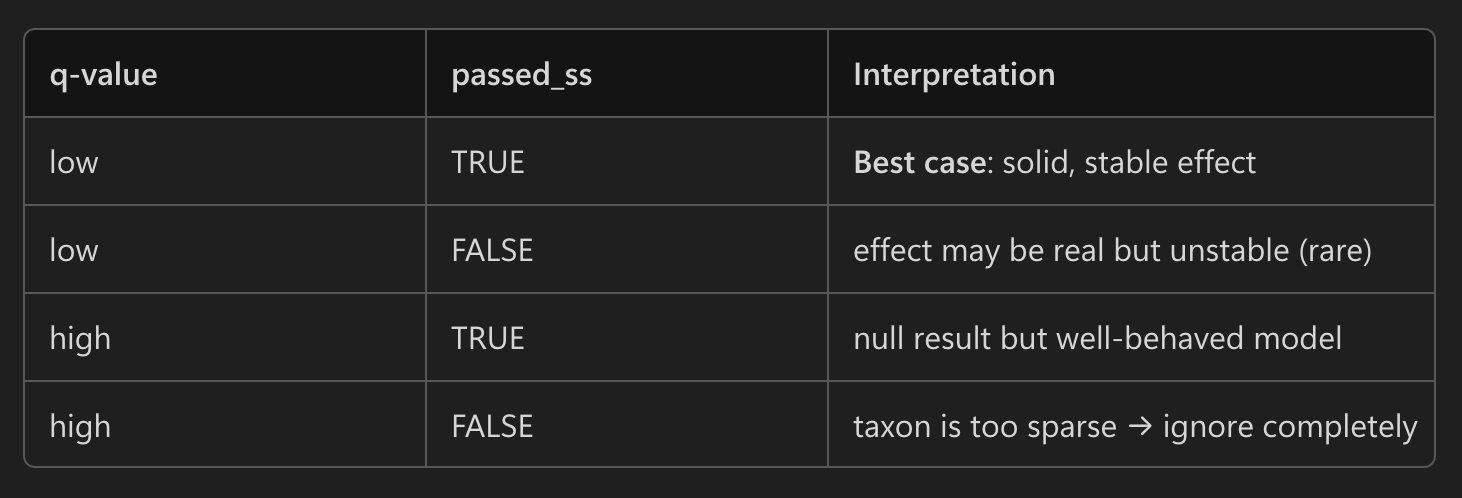

- **diff_robust**: indicates whether the bacteria passed the sensitivity analysis and is significant. Additionaly, denotes whether the robust bias‑correction version of the model (interaction) differs meaningfully from the main one where the covariate was held constant. If TRUE, this means there is a huge difference between the two models, so interpret with caution. If FALSE, the robust and main logFCs match closely.
  
Moving forward for visualizations, I'll likely focus on all the interaction columns. 

Note: This is not the same as running a crude model! In a crude model with no covariates, there aren't any variables that are being held constant like age or IgE. Therefore, crude models and these conditional differences in the adjusted can't be interpreted in the same way.

### Saliva Crude Results

In [12]:
# passed sensitivity filter and is significant 
saliva_pre_crude_df %>%
    filter(`P Adj` < 0.05 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

# passed sensitivity analysis with a relaxed filter
saliva_pre_crude_df %>%
    filter(`P Adj` < 0.1 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

# significant with a relaxed filter
saliva_pre_crude_df %>%
    filter(`P Adj` < 0.1) %>%
    nrow()

[1] 0

[1] 0

[1] 0

### Saliva Adjusted Results

In [13]:
print("IgE")
saliva_pre_ige_df %>%
    filter(`P Adj` < 0.05 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

saliva_pre_ige_df %>%
    filter(`P Adj` < 0.1 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

saliva_pre_ige_df %>%
    filter(`P Adj` < 0.1) %>%
    nrow()

print("Age")
saliva_pre_age_df %>%
    filter(`P Adj` < 0.05 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

saliva_pre_age_df %>%
    filter(`P Adj` < 0.1 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

saliva_pre_age_df %>%
    filter(`P Adj` < 0.1) %>%
    nrow()

[1] "IgE"


[1] 0

[1] 1

[1] 1

[1] "Age"


[1] 0

[1] 0

[1] 1

### Stool Crude Results

In [14]:
# passed sensitivity filter and is significant 
stool_pre_crude_df %>%
    filter(`P Adj` < 0.05 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

# passed sensitivity analysis with a relaxed filter
stool_pre_crude_df %>%
    filter(`P Adj` < 0.1 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

# significant with a relaxed filter
stool_pre_crude_df %>%
    filter(`P Adj` < 0.1) %>%
    nrow()

[1] 0

[1] 0

[1] 0

### Stool Adjusted Results

In [15]:
print("IgE")
stool_pre_ige_df %>%
    filter(`P Adj` < 0.05 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

stool_pre_ige_df %>%
    filter(`P Adj` < 0.1 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

stool_pre_ige_df %>%
    filter(`P Adj` < 0.1) %>%
    nrow()

print("Age")
stool_pre_age_df %>%
    filter(`P Adj` < 0.05 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

stool_pre_age_df %>%
    filter(`P Adj` < 0.1 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

stool_pre_age_df %>%
    filter(`P Adj` < 0.1) %>%
    nrow()

[1] "IgE"


[1] 0

[1] 0

[1] 5

[1] "Age"


[1] 0

[1] 0

[1] 3

# 2. How does the microbiome after undergoing treatment differ between subjects that had a muted or elevated allergic response? How are these abundances modulated by age and IgE?

In [16]:
# getting dfs first
post_saliva_df = combined_saliva_df %>%
    filter(Treatment == 'A', Time_Point == 'Post',
          Subject_No %notin% c(1,16,17,20,24,26,31,32,36,37,43)) %>%
    # making the row names the sample ids
    column_to_rownames(var = 'Sample_ID') %>%
    # normalizing ige and centering both ige and age
    mutate(IgE = as.numeric(scale(log(IgE), center = TRUE, scale = FALSE)), 
           Age = as.numeric(scale(Age, center = TRUE, scale = FALSE)))

post_stool_df = combined_stool_df %>%
    filter(Treatment == 'A', Time_Point == 'Post',
          Subject_No %notin% c(3,10,14,15,23,25,27,32,35,39)) %>%
    # making the row names the sample ids
    column_to_rownames(var = 'Sample_ID') %>%
    mutate(IgE = as.numeric(scale(log(IgE), center = TRUE, scale = FALSE)), 
           Age = as.numeric(scale(Age, center = TRUE, scale = FALSE)))

head(post_saliva_df)

,Original_Sample_ID,Subject_No,Time_Point,Treatment,Outcome,Age,IgE,IgE_Binarized,k__Bacteria.__.__.__.__.__.__,k__Bacteria.p__Absconditabacteria_.SR1..c__Absconditabacteria_.SR1._.C.1..o__Absconditabacteria_.SR1._.O.1..f__Absconditabacteria_.SR1._.F.1..g__Absconditabacteria_.SR1._.G.1..s__bacterium_HMT_874,⋯,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.__.__,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.g__Aggregatibacter.__,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.g__Aggregatibacter.s__aphrophilus,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.g__Haemophilus.__,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.g__Haemophilus.s__parainfluenzae,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.1..__,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.1..s__bacterium_HMT_347,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.1..s__bacterium_HMT_352,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.3..s__bacterium_HMT_351,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.6..s__bacterium_HMT_870
,<chr>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Post_2,FS0236mo,2,Post,A,F,-0.8410959,0.8886577,Low,63,25,⋯,698,0,43,98,1657,0,0,423,146,123
Post_4,FS0536mo,4,Post,A,F,1.2767123,0.4961366,Low,6,0,⋯,0,17,0,139,2521,0,0,502,39,101
Post_6,FS0736mo,6,Post,A,SU,-1.2958904,-1.4869525,Low,2,24,⋯,0,0,0,463,1646,7,0,167,61,437
Post_9,FS1036mo,9,Post,A,SU,-1.3260274,-2.6320848,Low,12,0,⋯,0,0,0,40,2064,4,0,481,23,438
Post_11,FS1236mo,11,Post,A,F,-1.1479452,-0.2967099,Low,28,12,⋯,0,0,0,594,5844,0,0,643,71,257
Post_14,FS1536mo,14,Post,A,F,1.1972603,2.8893761,High,13,0,⋯,55,0,0,681,3207,0,0,456,161,0


In [17]:
# calling fn
v2_genus_saliva_df = get_genus_df(post_saliva_df, 8)
v2_genus_stool_df = get_genus_df(post_stool_df, 9)

head(v2_genus_saliva_df)

,Original_Sample_ID,Subject_No,Time_Point,Treatment,Outcome,Age,IgE,IgE_Binarized,Abiotrophia,Absconditabacteria_,⋯,Schaalia,Selenomonas,Sneathia,Solobacterium,Stomatobaculum,Streptococcus,Tannerella,Unassigned,Veillonella,Weeksellaceae_
,<chr>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Post_2,FS0236mo,2,Post,A,F,-0.8410959,0.8886577,Low,72,424,⋯,991,449,10,71,256,10328,22,837,3686,0
Post_4,FS0536mo,4,Post,A,F,1.2767123,0.4961366,Low,169,40,⋯,225,65,13,32,20,10228,0,118,3412,22
Post_6,FS0736mo,6,Post,A,SU,-1.2958904,-1.4869525,Low,478,24,⋯,336,105,37,77,19,12883,11,274,2045,12
Post_9,FS1036mo,9,Post,A,SU,-1.3260274,-2.6320848,Low,106,0,⋯,869,101,0,93,264,8040,9,84,4500,0
Post_11,FS1236mo,11,Post,A,F,-1.1479452,-0.2967099,Low,87,12,⋯,728,49,16,129,86,11648,46,169,3784,49
Post_14,FS1536mo,14,Post,A,F,1.1972603,2.8893761,High,25,0,⋯,485,443,0,63,355,5641,50,100,6136,6


How many subjects and bacteria are included in this analysis?

In [18]:
length(unique(v2_genus_saliva_df$Subject_No))
length(unique(v2_genus_stool_df$Subject_No))

ncol(v2_genus_saliva_df) - 8
ncol(v2_genus_stool_df) - 9

[1] 16

[1] 12

[1] 51

[1] 99

In [19]:
# calling amcombc2 fn
saliva_post_crude = get_ancombc2_results(v2_genus_saliva_df, 'Outcome', 8, FALSE, 'Outcome', 'SU')
saliva_post_ige = get_ancombc2_results(v2_genus_saliva_df, 'IgE * Outcome', 8, FALSE, 'Outcome', 'SU')
saliva_post_age = get_ancombc2_results(v2_genus_saliva_df, 'Age * Outcome', 8, FALSE, 'Outcome', 'SU')
stool_post_crude = get_ancombc2_results(v2_genus_stool_df, 'Outcome', 9, FALSE, 'Outcome', 'SU')
stool_post_ige = get_ancombc2_results(v2_genus_stool_df, 'IgE * Outcome', 9, FALSE, 'Outcome', 'SU')
stool_post_age = get_ancombc2_results(v2_genus_stool_df, 'Age * Outcome', 9, FALSE, 'Outcome', 'SU')

Checking the input data type ...

The input data is of type: matrix

The imported data is in a generic 'matrix'/'data.frame' format.

PASS

Checking the sample metadata ...

The specified variables in the formula: Outcome

The available variables in the sample metadata: Original_Sample_ID, Subject_No, Time_Point, Treatment, Outcome, Age, IgE, IgE_Binarized

PASS

Checking other arguments ...

The number of groups of interest is: 2

Warning message:
“The group variable has < 3 categories 
The multi-group comparisons (global/pairwise/dunnet/trend) will be deactivated”
The sample size per group is: F = 7, SU = 9

PASS

Obtaining initial estimates ...

Estimating sample-specific biases ...

ANCOM-BC2 primary results ...

Conducting sensitivity analysis for pseudo-count addition to 0s ...
For taxa that are significant but do not pass the sensitivity analysis,
they are marked in the 'passed_ss' column and will be treated as non-significant in the 'diff_robust' column.
For detailed instructio

In [20]:
# calling cleaning col names fn
saliva_post_crude_df = clean_crude_model_colnames(saliva_post_crude)
stool_post_crude_df = clean_crude_model_colnames(stool_post_crude)
saliva_post_ige_df = clean_adj_model_colnames(saliva_post_ige)
saliva_post_age_df = clean_adj_model_colnames(saliva_post_age)
stool_post_ige_df = clean_adj_model_colnames(stool_post_ige)
stool_post_age_df = clean_adj_model_colnames(stool_post_age)

head(saliva_post_ige_df)

,Name,logFC,Interaction_logFC,P Value,P Adj,Sensitivity Analysis
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,Abiotrophia,0.7041784,-0.0578929,0.90944564,0.9481455,TRUE
2,Absconditabacteria_,1.2385798,1.5143301,0.01875637,0.4595310,TRUE
3,Actinomyces,0.6357013,-0.1550549,0.65733215,0.8705210,TRUE
4,Aggregatibacter,-0.8911460,-0.6642460,0.13852974,0.7931916,TRUE
5,Alloprevotella,-1.0775632,0.4858798,0.46616186,0.7931916,TRUE
6,Arachnia,1.0806205,-0.4202834,0.30990354,0.7931916,TRUE


### Saliva Crude Results

In [21]:
# passed sensitivity filter and is significant 
saliva_post_crude_df %>%
    filter(`P Adj` < 0.05 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

# passed sensitivity analysis with a relaxed filter
saliva_post_crude_df %>%
    filter(`P Adj` < 0.1 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

# significant with a relaxed filter
saliva_post_crude_df %>%
    filter(`P Adj` < 0.1) %>%
    nrow()

[1] 0

[1] 0

[1] 0

### Saliva Adjusted Results

In [22]:
print("IgE")
saliva_post_ige_df %>%
    filter(`P Adj` < 0.05 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

saliva_post_ige_df %>%
    filter(`P Adj` < 0.1 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

saliva_post_ige_df %>%
    filter(`P Adj` < 0.1) %>%
    nrow()

print("Age")
saliva_post_age_df %>%
    filter(`P Adj` < 0.05 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

saliva_post_age_df %>%
    filter(`P Adj` < 0.1 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

saliva_post_age_df %>%
    filter(`P Adj` < 0.1) %>%
    nrow()

[1] "IgE"


[1] 0

[1] 0

[1] 0

[1] "Age"


[1] 0

[1] 0

[1] 0

### Stool Crude Results

In [23]:
# passed sensitivity filter and is significant 
stool_post_crude_df %>%
    filter(`P Adj` < 0.05 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

# passed sensitivity analysis with a relaxed filter
stool_post_crude_df %>%
    filter(`P Adj` < 0.1 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

# significant with a relaxed filter
stool_post_crude_df %>%
    filter(`P Adj` < 0.1) %>%
    nrow()

[1] 0

[1] 0

[1] 0

### Stool Adjusted Results

In [24]:
print("IgE")
stool_post_ige_df %>%
    filter(`P Adj` < 0.05 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

stool_post_ige_df %>%
    filter(`P Adj` < 0.1 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

stool_post_ige_df %>%
    filter(`P Adj` < 0.1) %>%
    nrow()

print("Age")
stool_post_age_df %>%
    filter(`P Adj` < 0.05 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

stool_post_age_df %>%
    filter(`P Adj` < 0.1 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

stool_post_age_df %>%
    filter(`P Adj` < 0.1) %>%
    nrow()

[1] "IgE"


[1] 0

[1] 1

[1] 4

[1] "Age"


[1] 0

[1] 6

[1] 14

## 3. What microbiota associate with IgE concentrations at baseline? How is that affected by age?

In [25]:
v3_saliva_df = combined_saliva_df %>%
    # only keep participants' baseline samples 
    filter(Time_Point == 'Pre') %>%
    # making the row names the sample ids
    column_to_rownames(var = 'Sample_ID') %>%
    mutate(Age = as.numeric(scale(Age, center = TRUE, scale = FALSE)))

v3_stool_df = combined_stool_df %>%
     filter(Time_Point == 'Pre') %>%
    column_to_rownames(var = 'Sample_ID') %>%
    mutate(Age = as.numeric(scale(Age, center = TRUE, scale = FALSE)))


In [26]:
# calling fn
v3_genus_saliva_df = get_genus_df(v3_saliva_df, 8)
v3_genus_stool_df = get_genus_df(v3_stool_df, 9)

head(v3_genus_saliva_df)

,Original_Sample_ID,Subject_No,Time_Point,Treatment,Outcome,Age,IgE,IgE_Binarized,Abiotrophia,Absconditabacteria_,⋯,Schaalia,Selenomonas,Sneathia,Solobacterium,Stomatobaculum,Streptococcus,Tannerella,Unassigned,Veillonella,Weeksellaceae_
,<chr>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Pre_1,FS01baseline,1,Pre,P,F,1.2541683,41.00,High,176,38,⋯,62,33,0,4,5,4360,0,17036,857,0
Pre_2,FS02baseline,2,Pre,A,F,-0.7102153,14.20,Low,272,16,⋯,207,8,0,30,14,14300,2,187,4035,16
Pre_3,FS04baseline,3,Pre,P,F,1.1308806,67.40,High,121,0,⋯,13,9,0,6,0,16005,63,3477,35,0
Pre_4,FS05baseline,4,Pre,A,F,1.4075930,9.59,Low,406,8,⋯,533,8,0,52,80,13579,0,138,672,0
Pre_5,FS06baseline,5,Pre,P,F,-0.2280235,106.00,High,441,11,⋯,247,0,0,14,6,12240,9,398,2927,0
Pre_6,FS07baseline,6,Pre,A,SU,-1.1650098,1.32,Low,48,0,⋯,43,0,185,0,0,15040,0,135,2183,135


How many subjects and bacteria do we have?

In [27]:
nrow(v3_genus_saliva_df)
nrow(v3_genus_stool_df)

ncol(v3_genus_saliva_df) - 8
ncol(v3_genus_stool_df) - 9

[1] 35

[1] 33

[1] 51

[1] 99

In [28]:
# calling fn
saliva_ige = get_ancombc2_results(v3_genus_saliva_df, 'IgE_Binarized', 8, FALSE, 'IgE_Binarized', 'High')
saliva_ige_cov = get_ancombc2_results(v3_genus_saliva_df, 'Age * IgE_Binarized', 8, FALSE, 'IgE_Binarized', 'High')
stool_ige = get_ancombc2_results(v3_genus_stool_df, 'IgE_Binarized', 9, FALSE, 'IgE_Binarized', 'High')
stool_ige_cov = get_ancombc2_results(v3_genus_stool_df, 'Age * IgE_Binarized', 9, FALSE, 'IgE_Binarized', 'High')

Checking the input data type ...

The input data is of type: matrix

The imported data is in a generic 'matrix'/'data.frame' format.

PASS

Checking the sample metadata ...

The specified variables in the formula: IgE_Binarized

The available variables in the sample metadata: Original_Sample_ID, Subject_No, Time_Point, Treatment, Outcome, Age, IgE, IgE_Binarized

PASS

Checking other arguments ...

The number of groups of interest is: 2

Warning message:
“The group variable has < 3 categories 
The multi-group comparisons (global/pairwise/dunnet/trend) will be deactivated”
The sample size per group is: Low = 21, High = 14

PASS

Obtaining initial estimates ...

Estimating sample-specific biases ...

ANCOM-BC2 primary results ...

Conducting sensitivity analysis for pseudo-count addition to 0s ...
For taxa that are significant but do not pass the sensitivity analysis,
they are marked in the 'passed_ss' column and will be treated as non-significant in the 'diff_robust' column.
For detaile

In [32]:
# calling cleaning col names fn
saliva_ige_df = clean_crude_model_colnames(saliva_ige)
stool_ige_df = clean_crude_model_colnames(stool_ige)

saliva_ige_cov_df = clean_adj_model_colnames(saliva_ige_cov)
stool_ige_cov_df = clean_adj_model_colnames(stool_ige_cov)

head(saliva_ige_cov_df)

,Name,logFC,Interaction_logFC,P Value,P Adj,Sensitivity Analysis
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,Abiotrophia,0.2860705,-0.92024400,0.06899015,0.3431624,TRUE
2,Absconditabacteria_,-0.3440894,-0.06862801,0.87892910,0.9917339,TRUE
3,Actinomyces,0.5998874,-0.05384453,0.92744555,0.9917339,TRUE
4,Aggregatibacter,0.3266712,-0.81763323,0.04529208,0.2660910,TRUE
5,Alloprevotella,-0.5478975,-0.08789727,0.86391124,0.9917339,TRUE
6,Arachnia,0.1774624,0.52237305,0.32833108,0.7348362,TRUE


In [33]:
# passed sensitivity filter and is significant 
saliva_ige_df %>%
    filter(`P Adj` < 0.05 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

# passed sensitivity analysis with a relaxed filter
saliva_ige_df %>%
    filter(`P Adj` < 0.1 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

# significant with a relaxed filter
saliva_ige_df %>%
    filter(`P Adj` < 0.1) %>%
    nrow()

[1] 0

[1] 0

[1] 0

In [34]:
# passed sensitivity filter and is significant 
saliva_ige_cov_df %>%
    filter(`P Adj` < 0.05 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

# passed sensitivity analysis with a relaxed filter
saliva_ige_cov_df %>%
    filter(`P Adj` < 0.1 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

# significant with a relaxed filter
saliva_ige_cov_df %>%
    filter(`P Adj` < 0.1) %>%
    nrow()

[1] 0

[1] 0

[1] 2

In [35]:
# passed sensitivity filter and is significant 
stool_ige_df %>%
    filter(`P Adj` < 0.05 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

# passed sensitivity analysis with a relaxed filter
stool_ige_df %>%
    filter(`P Adj` < 0.1 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

# significant with a relaxed filter
stool_ige_df %>%
    filter(`P Adj` < 0.1) %>%
    nrow()

[1] 0

[1] 0

[1] 0

In [36]:
# passed sensitivity filter and is significant 
stool_ige_cov_df %>%
    filter(`P Adj` < 0.05 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

# passed sensitivity analysis with a relaxed filter
stool_ige_cov_df %>%
    filter(`P Adj` < 0.1 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

# significant with a relaxed filter
stool_ige_cov_df %>%
    filter(`P Adj` < 0.1) %>%
    nrow()

[1] 0

[1] 0

[1] 14

# 3. Are there significant changes in the microbiome after receiving treatment? How are those changes modified after controlling for age and IgE as covariates?

In [50]:
# getting dfs first
paired_saliva_df = combined_saliva_df %>%
    # removing 11 participants that don't have pre and post samples
    filter(Subject_No %notin% c(1,16,17,20,24,26,31,32,36,37,43),
    # retaining those given treatment
          Treatment == 'A') %>%
    # making the row names the sample ids
    column_to_rownames(var = 'Sample_ID') %>%
    # normalizing ige and centering both ige and age
    mutate(IgE = as.numeric(scale(log(IgE), center = TRUE, scale = FALSE)), 
           Age = as.numeric(scale(Age, center = TRUE, scale = FALSE)))

paired_stool_df = combined_stool_df %>%
    # removing 12 participants that don't have pre and post samples
    filter(Subject_No %notin% c(3,10,14,15,23,25,27,32,35,39),
    # retaining those given treatment
          Treatment == 'A') %>%
    # making the row names the sample ids
    column_to_rownames(var = 'Sample_ID') %>%
    mutate(IgE = as.numeric(scale(log(IgE), center = TRUE, scale = FALSE)), 
           Age = as.numeric(scale(Age, center = TRUE, scale = FALSE)))

head(paired_saliva_df)

,Original_Sample_ID,Subject_No,Time_Point,Treatment,Outcome,Age,IgE,IgE_Binarized,k__Bacteria.__.__.__.__.__.__,k__Bacteria.p__Absconditabacteria_.SR1..c__Absconditabacteria_.SR1._.C.1..o__Absconditabacteria_.SR1._.O.1..f__Absconditabacteria_.SR1._.F.1..g__Absconditabacteria_.SR1._.G.1..s__bacterium_HMT_874,⋯,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.__.__,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.g__Aggregatibacter.__,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.g__Aggregatibacter.s__aphrophilus,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.g__Haemophilus.__,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.g__Haemophilus.s__parainfluenzae,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.1..__,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.1..s__bacterium_HMT_347,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.1..s__bacterium_HMT_352,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.3..s__bacterium_HMT_351,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.6..s__bacterium_HMT_870
,<chr>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Post_2,FS0236mo,2,Post,A,F,-0.8410959,0.8886577,Low,63,25,⋯,698,0,43,98,1657,0,0,423,146,123
Pre_2,FS02baseline,2,Pre,A,F,-0.8410959,0.8886577,Low,0,16,⋯,0,0,46,371,3359,0,0,0,0,112
Post_4,FS0536mo,4,Post,A,F,1.2767123,0.4961366,Low,6,0,⋯,0,17,0,139,2521,0,0,502,39,101
Pre_4,FS05baseline,4,Pre,A,F,1.2767123,0.4961366,Low,24,0,⋯,0,0,0,110,1225,40,4,403,35,167
Post_6,FS0736mo,6,Post,A,SU,-1.2958904,-1.4869525,Low,2,24,⋯,0,0,0,463,1646,7,0,167,61,437
Pre_6,FS07baseline,6,Pre,A,SU,-1.2958904,-1.4869525,Low,7,0,⋯,0,0,0,2315,1978,0,16,0,5,28


How many subjects are included in this analysis?

In [24]:
length(unique(paired_saliva_df$Subject_No))
length(unique(paired_stool_df$Subject_No))

[1] 16

[1] 12

In [13]:
# calling fn
#paired_saliva_crude = get_ancombc2_results(paired_saliva_df, 'Time_Point', 8, TRUE, 'Time_Point', NULL)
paired_saliva_2cov = get_ancombc2_results(paired_saliva_df, 'Outcome + IgE * Time_Point', 8, TRUE, 'Time_Point', NULL)
#paired_stool_crude = get_ancombc2_results(paired_stool_df, 'Time_Point', 9, TRUE, 'Time_Point', NULL)
paired_stool_2cov = get_ancombc2_results(paired_stool_df, 'Outcome + IgE * Time_Point', 9, TRUE, 'Time_Point', NULL)

Checking the input data type ...

The input data is of type: matrix

The imported data is in a generic 'matrix'/'data.frame' format.

PASS

Checking the sample metadata ...

The specified variables in the formula: Outcome, IgE, Time_Point

The available variables in the sample metadata: Original_Sample_ID, Subject_No, Time_Point, Treatment, Outcome, Age, IgE, IgE_Binarized

PASS

Checking other arguments ...

The number of groups of interest is: 2

Warning message:
“The group variable has < 3 categories 
The multi-group comparisons (global/pairwise/dunnet/trend) will be deactivated”
The sample size per group is: Pre = 16, Post = 16

PASS

Obtaining initial estimates ...

Estimating sample-specific biases ...

ANCOM-BC2 primary results ...

Conducting sensitivity analysis for pseudo-count addition to 0s ...
For taxa that are significant but do not pass the sensitivity analysis,
they are marked in the 'passed_ss' column and will be treated as non-significant in the 'diff_robust' column.


## Paired Saliva Crude Results

In [75]:
#test = paired_saliva_2cov
write.xlsx(stool_post_age, paste0(Output,"/", "test", cur_date, ".xlsx"), rowNames = FALSE)

In [26]:
# passed sensitivity filter and is significant 
paired_saliva_crude %>%
    filter(diff_robust_Time_PointPost == TRUE) %>%
    nrow()

# passed sensitivity analysis with a relaxed filter
paired_saliva_crude %>%
    filter(`P Adj` < 0.1 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

# significant with a relaxed filter
paired_saliva_crude %>%
    filter(`P Adj` < 0.1) %>%
    nrow()

[1] 0

[1] 1

[1] 1

## Paired Adjusted Saliva Results

In [27]:
# passed sensitivity filter and is significant 
paired_saliva_2cov %>%
    filter(diff_robust_Time_PointPost == TRUE) %>%
    nrow()

# passed sensitivity analysis with a relaxed filter
paired_saliva_2cov %>%
    filter(`P Adj` < 0.1 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

# significant with a relaxed filter
paired_saliva_2cov %>%
    filter(`P Adj` < 0.1) %>%
    nrow()

[1] 0

[1] 5

[1] 5

## Paired Stool Results

In [28]:
# passed sensitivity filter and is significant 
paired_stool_crude %>%
    filter(diff_robust_Time_PointPost == TRUE) %>%
    nrow()

# passed sensitivity analysis with a relaxed filter
paired_stool_crude %>%
    filter(`P Adj` < 0.1 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

# significant with a relaxed filter
paired_stool_crude %>%
    filter(`P Adj` < 0.1) %>%
    nrow()

[1] 0

[1] 0

[1] 3

## Paired Stool Adjusted Results

In [29]:
# passed sensitivity filter and is significant 
paired_stool_2cov %>%
    filter(diff_robust_Time_PointPost == TRUE) %>%
    nrow()

# passed sensitivity analysis with a relaxed filter
paired_stool_2cov %>%
    filter(`P Adj` < 0.1 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

# significant with a relaxed filter
paired_stool_2cov %>%
    filter(`P Adj` < 0.1) %>%
    nrow()

[1] 0

[1] 3

[1] 4

# 5. Comparing microbiomes before and after treatment but stratifying with each outcome.

In [63]:
saliva_grouped_df = paired_saliva_df %>%
    rownames_to_column(var = "Sample_ID") %>%
    group_by(Outcome) %>%
    group_split()
stool_grouped_df = paired_stool_df %>%
    rownames_to_column(var = "Sample_ID") %>%
    group_by(Outcome) %>%
    group_split()

failure_saliva_df = data.frame(saliva_grouped_df[[1]]) %>%
    column_to_rownames(var = 'Sample_ID')
su_saliva_df = data.frame(saliva_grouped_df[[2]]) %>%
    column_to_rownames(var = 'Sample_ID')
failure_stool_df = data.frame(stool_grouped_df[[1]]) %>%
    column_to_rownames(var = 'Sample_ID')
su_stool_df = data.frame(stool_grouped_df[[2]]) %>%
    column_to_rownames(var = 'Sample_ID')

head(failure_saliva_df)

,Original_Sample_ID,Subject_No,Time_Point,Treatment,Outcome,Age,IgE,IgE_Binarized,k__Bacteria.__.__.__.__.__.__,k__Bacteria.p__Absconditabacteria_.SR1..c__Absconditabacteria_.SR1._.C.1..o__Absconditabacteria_.SR1._.O.1..f__Absconditabacteria_.SR1._.F.1..g__Absconditabacteria_.SR1._.G.1..s__bacterium_HMT_874,⋯,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.__.__,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.g__Aggregatibacter.__,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.g__Aggregatibacter.s__aphrophilus,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.g__Haemophilus.__,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.g__Haemophilus.s__parainfluenzae,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.1..__,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.1..s__bacterium_HMT_347,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.1..s__bacterium_HMT_352,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.3..s__bacterium_HMT_351,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.6..s__bacterium_HMT_870
,<chr>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Post_2,FS0236mo,2,Post,A,F,1.873973,14.20,Low,63,25,⋯,698,0,43,98,1657,0,0,423,146,123
Pre_2,FS02baseline,2,Pre,A,F,1.873973,14.20,Low,0,16,⋯,0,0,46,371,3359,0,0,0,0,112
Post_4,FS0536mo,4,Post,A,F,3.991781,9.59,Low,6,0,⋯,0,17,0,139,2521,0,0,502,39,101
Pre_4,FS05baseline,4,Pre,A,F,3.991781,9.59,Low,24,0,⋯,0,0,0,110,1225,40,4,403,35,167
Post_11,FS1236mo,11,Post,A,F,1.567123,4.34,Low,28,12,⋯,0,0,0,594,5844,0,0,643,71,257
Pre_11,FS12baseline,11,Pre,A,F,1.567123,4.34,Low,8,0,⋯,0,0,0,16,4652,0,0,37,7,31


How many subjects are included in this analysis?

In [50]:
length(unique(failure_saliva_df$Subject_No))
length(unique(su_saliva_df$Subject_No))
length(unique(failure_stool_df$Subject_No))
length(unique(su_stool_df$Subject_No))

[1] 7

[1] 9

[1] 4

[1] 8

In [64]:
# calling fn
paired_saliva_stratified_fail_crude = get_ancombc2_results(failure_saliva_df, 'Time_Point', 8, TRUE, 'Time_Point', 'Post')
paired_saliva_stratified_fail_2cov = get_ancombc2_results(failure_saliva_df, 'Age + IgE + Time_Point', 8, TRUE, 'Time_Point', 'Post')
paired_saliva_stratified_su_crude = get_ancombc2_results(su_saliva_df, 'Time_Point', 8, TRUE, 'Time_Point', 'Post')
paired_saliva_stratified_su_2cov = get_ancombc2_results(su_saliva_df, 'Age + IgE + Time_Point', 8, TRUE, 'Time_Point', 'Post')
paired_stool_stratified_fail_crude = get_ancombc2_results(failure_stool_df, 'Time_Point', 9, TRUE, 'Time_Point', 'Post')
paired_stool_stratified_fail_2cov = get_ancombc2_results(failure_stool_df, 'Age + IgE + Time_Point', 9, TRUE, 'Time_Point', 'Post')
paired_stool_stratified_su_crude = get_ancombc2_results(su_stool_df, 'Time_Point', 9, TRUE, 'Time_Point', 'Post')
paired_stool_stratified_su_2cov = get_ancombc2_results(su_stool_df, 'Age + IgE + Time_Point', 9, TRUE, 'Time_Point', 'Post')

Checking the input data type ...

The input data is of type: matrix

The imported data is in a generic 'matrix'/'data.frame' format.

PASS

Checking the sample metadata ...

The specified variables in the formula: Time_Point

The available variables in the sample metadata: Original_Sample_ID, Subject_No, Time_Point, Treatment, Outcome, Age, IgE, IgE_Binarized

PASS

Checking other arguments ...

The number of groups of interest is: 2

Warning message:
“The group variable has < 3 categories 
The multi-group comparisons (global/pairwise/dunnet/trend) will be deactivated”
The sample size per group is: Pre = 7, Post = 7

PASS

Obtaining initial estimates ...

Estimating sample-specific biases ...

ANCOM-BC2 primary results ...

Conducting sensitivity analysis for pseudo-count addition to 0s ...
For taxa that are significant but do not pass the sensitivity analysis,
they are marked in the 'passed_ss' column and will be treated as non-significant in the 'diff_robust' column.
For detailed ins

In [65]:
# passed sensitivity filter and is significant 
paired_saliva_stratified_fail_crude %>%
    filter(diff_robust_Time_PointPost == TRUE) %>%
    nrow()

# passed sensitivity analysis with a relaxed filter
paired_saliva_stratified_fail_crude %>%
    filter(`P Adj` < 0.1 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

# significant with a relaxed filter
paired_saliva_stratified_fail_crude %>%
    filter(`P Adj` < 0.1) %>%
    nrow()

# passed sensitivity filter and is significant 
paired_saliva_stratified_fail_2cov %>%
    filter(diff_robust_Time_PointPost == TRUE) %>%
    nrow()

# passed sensitivity analysis with a relaxed filter
paired_saliva_stratified_fail_2cov %>%
    filter(`P Adj` < 0.1 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

# significant with a relaxed filter
paired_saliva_stratified_fail_2cov %>%
    filter(`P Adj` < 0.1) %>%
    nrow()

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

In [66]:
# passed sensitivity filter and is significant 
paired_saliva_stratified_su_crude %>%
    filter(diff_robust_Time_PointPost == TRUE) %>%
    nrow()

# passed sensitivity analysis with a relaxed filter
paired_saliva_stratified_su_crude %>%
    filter(`P Adj` < 0.1 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

# significant with a relaxed filter
paired_saliva_stratified_su_crude %>%
    filter(`P Adj` < 0.1) %>%
    nrow()

# passed sensitivity filter and is significant 
paired_saliva_stratified_su_2cov %>%
    filter(diff_robust_Time_PointPost == TRUE) %>%
    nrow()

# passed sensitivity analysis with a relaxed filter
paired_saliva_stratified_su_2cov %>%
    filter(`P Adj` < 0.1 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

# significant with a relaxed filter
paired_saliva_stratified_su_2cov %>%
    filter(`P Adj` < 0.1) %>%
    nrow()

[1] 0

[1] 0

[1] 0

[1] 0

[1] 2

[1] 2

In [70]:
paired_saliva_stratified_su_2cov[,2:7] %>%
    filter(`P Adj` < 0.1)

Name,logFC,P Value,P Adj,Sensitivity Analysis,diff_robust_Time_PointPost
<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
Actinomyces graevenitzii,1.946923,0.0008774132,0.05238533,TRUE,FALSE
Sneathia vaginalis,-1.918605,0.0011641183,0.05238533,TRUE,FALSE


In [67]:
# passed sensitivity filter and is significant 
paired_stool_stratified_fail_crude %>%
    filter(diff_robust_Time_PointPost == TRUE) %>%
    nrow()

# passed sensitivity analysis with a relaxed filter
paired_stool_stratified_fail_crude %>%
    filter(`P Adj` < 0.1 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

# significant with a relaxed filter
paired_stool_stratified_fail_crude %>%
    filter(`P Adj` < 0.1) %>%
    nrow()

# passed sensitivity filter and is significant 
paired_stool_stratified_fail_2cov %>%
    filter(diff_robust_Time_PointPost == TRUE) %>%
    nrow()

# passed sensitivity analysis with a relaxed filter
paired_stool_stratified_fail_2cov %>%
    filter(`P Adj` < 0.1 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

# significant with a relaxed filter
paired_stool_stratified_fail_2cov %>%
    filter(`P Adj` < 0.1) %>%
    nrow()

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

In [68]:
# passed sensitivity filter and is significant 
paired_stool_stratified_su_crude %>%
    filter(diff_robust_Time_PointPost == TRUE) %>%
    nrow()

# passed sensitivity analysis with a relaxed filter
paired_stool_stratified_su_crude %>%
    filter(`P Adj` < 0.1 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

# significant with a relaxed filter
paired_stool_stratified_su_crude %>%
    filter(`P Adj` < 0.1) %>%
    nrow()

# passed sensitivity filter and is significant 
paired_stool_stratified_su_2cov %>%
    filter(diff_robust_Time_PointPost == TRUE) %>%
    nrow()

# passed sensitivity analysis with a relaxed filter
paired_stool_stratified_su_2cov %>%
    filter(`P Adj` < 0.1 & `Sensitivity Analysis` == TRUE) %>%
    nrow()

# significant with a relaxed filter
paired_stool_stratified_su_2cov %>%
    filter(`P Adj` < 0.1) %>%
    nrow()

[1] 0

[1] 0

[1] 1

[1] 0

[1] 1

[1] 1

In [72]:
paired_stool_stratified_su_crude[,2:7] %>%
    filter(`P Adj` < 0.1)
paired_stool_stratified_su_2cov[,2:7] %>%
    filter(`P Adj` < 0.1)

Name,logFC,P Value,P Adj,Sensitivity Analysis,diff_robust_Time_PointPost
<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
Terrisporobacter,-4.005186,0.0004902813,0.04412532,FALSE,FALSE


Name,logFC,P Value,P Adj,Sensitivity Analysis,diff_robust_Time_PointPost
<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
Terrisporobacter,-2.976914,0.0007787034,0.07008331,TRUE,FALSE


In [37]:
#exporting
write.xlsx(saliva_crude_df, paste0(Output,"/", "Saliva_Pre_Outcome_", cur_date, ".xlsx"), rowNames = FALSE)
write.xlsx(saliva_2cov_df, paste0(Output,"/", "Saliva_Adj_Pre_Outcome_", cur_date, ".xlsx"), rowNames = FALSE)
write.xlsx(stool_crude_df, paste0(Output,"/", "Stool_Pre_Outcome_", cur_date, ".xlsx"), rowNames = FALSE)
write.xlsx(stool_2cov_df, paste0(Output,"/", "Stool_Adj_Pre_Outcome_", cur_date, ".xlsx"), rowNames = FALSE)
write.xlsx(saliva_ige, paste0(Output,"/", "Saliva_IgE_", cur_date, ".xlsx"), rowNames = FALSE)
write.xlsx(saliva_ige_cov, paste0(Output,"/", "Saliva_Adj_IgE_", cur_date, ".xlsx"), rowNames = FALSE)
write.xlsx(stool_ige, paste0(Output,"/", "Stool_IgE_", cur_date, ".xlsx"), rowNames = FALSE)
write.xlsx(stool_ige_cov, paste0(Output,"/", "Stool_Adj_IgE_", cur_date, ".xlsx"), rowNames = FALSE)
write.xlsx(paired_saliva_crude, paste0(Output,"/", "Saliva_Paired_", cur_date, ".xlsx"), rowNames = FALSE)
write.xlsx(paired_saliva_2cov, paste0(Output,"/", "Saliva_Adj_Paired_", cur_date, ".xlsx"), rowNames = FALSE)
write.xlsx(paired_stool_crude, paste0(Output,"/", "Stool_Paired_", cur_date, ".xlsx"), rowNames = FALSE)
write.xlsx(paired_stool_2cov, paste0(Output,"/", "Stool_Adj_Paired_", cur_date, ".xlsx"), rowNames = FALSE)
write.xlsx(post_saliva_crude, paste0(Output,"/", "Saliva_Post_Outcome_", cur_date, ".xlsx"), rowNames = FALSE)
write.xlsx(post_saliva_2cov, paste0(Output,"/", "Saliva_Adj_Post_Outcome_", cur_date, ".xlsx"), rowNames = FALSE)
write.xlsx(post_stool_crude, paste0(Output,"/", "Stool_Post_Outcome_", cur_date, ".xlsx"), rowNames = FALSE)
write.xlsx(post_stool_2cov, paste0(Output,"/", "Stool_Adj_Post_Outcome_", cur_date, ".xlsx"), rowNames = FALSE)